## Day 25 Lecture 2 Assignment

In this assignment, we will extend a previous binary model to a multinomial case with three classes. We will use the FIFA soccer ratings dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, auc
    
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import seaborn as sns

In [2]:
def remove_correlated_features(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]

    return dataset

In [3]:
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [4]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,80,54,41,87,89,86,91,34,27,22


In [5]:
# Create a copy of the dataFrame so we can retain the original
soccer_data2 = soccer_data.copy()

Our response for our logistic regression model is going to be a new column, "RankingTier", that contains three categories:

- High: Overall score > 75
- Middle: Overall score between 65 and 75
- Low: Overall score < 65

In [6]:
# answer goes here
soccer_data2['RankingTier'] = np.where(soccer_data2['Overall'] > 75, 'High', 
                (np.where(soccer_data2['Overall'] < 65, 'Low', 'Middle')))

soccer_data2.filter(['Overall', 'RankingTier'])


,Overall,RankingTier
0,94,High
1,94,High
2,92,High
3,91,High
4,91,High
...,...,...
16117,47,Low
16118,47,Low
16119,47,Low
16120,47,Low


The next few steps until model training are the same as before: identify and remove highly correlated features, and split the data into a training set (80%) and a test set (20%).

In [7]:
# answer goes here
soccer_data2 = remove_correlated_features(soccer_data2, 0.9)
Y = soccer_data2.RankingTier
X = soccer_data2.drop(columns=['ID', 'Name','Overall', 'RankingTier'])
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

Deleted StandingTackle from dataset.
Deleted SlidingTackle from dataset.


Fit a multinomial logistic regression model using the statsmodels package and print out the coefficient summary. What is the "reference" tier chosen by the model? How do we interpret the coefficients - for example, how does the intepretation of the "Reactions" coefficient for RankingTier=Low differ from the "Reactions" coefficient for RankingTier=Middle?

In [8]:
# answer goes here
X_train_constant = sm.add_constant(X_train)
msm = sm.MNLogit(y_train ,X_train_constant).fit()

msm.summary()

Optimization terminated successfully.
         Current function value: 0.340451
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            RankingTier   No. Observations:                12897
Model:                        MNLogit   Df Residuals:                    12841
Method:                           MLE   Df Model:                           54
Date:                Fri, 16 Oct 2020   Pseudo R-squ.:                  0.6289
Time:                        16:50:03   Log-Likelihood:                -4390.8
converged:                       True   LL-Null:                       -11831.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
   RankingTier=Low       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 98.5964      2.217     44.465      0.000      94.250     102.942
Crossing              -0.0110      0.008     -1.307      0.191      -0.027       0.005
Finishing             -0.0434      0.010     -4.289      0.000      -0.063      -0.024
HeadingAccuracy       -0.1163      0.009    -12.918      0.000      -0.134      -0.099
ShortPassing          -0.2707      0.022    -12.572      0.000      -0.313      -0.228
Volleys                0.0221      0.009      2.591      0.010       0.005       0.039
Dribbling              0.0072      0.016      0.453      0.650      -0.024       0.038
Curve                 -0.0004      0.009     -0.043      0.966      -0.018       0.017
FKAccuracy            -0.0087      0.007     -1.179      0.239      -0.023       0.006
LongPassing            0.0100      0.012      0.829      0.407      -0.014       0.034
BallControl           -0.3243      0.023    -14.320      0.000      -0.369      -0.280
Acceleration          -0.0624      0.014     -4.515      0.000      -0.090      -0.035
SprintSpeed           -0.0537      0.012     -4.324      0.000      -0.078      -0.029
Agility                0.0031      0.012      0.255      0.799      -0.021       0.027
Reactions             -0.4531      0.018    -25.366      0.000      -0.488      -0.418
Balance                0.0300      0.009      3.161      0.002       0.011       0.049
ShotPower             -0.0578      0.011     -5.287      0.000      -0.079      -0.036
Jumping               -0.0140      0.007     -2.076      0.038      -0.027      -0.001
Stamina               -0.0065      0.008     -0.807      0.419      -0.022       0.009
Strength              -0.0538      0.010     -5.511      0.000      -0.073      -0.035
LongShots              0.0483      0.010      4.666      0.000       0.028       0.069
Aggression            -0.0233      0.007     -3.205      0.001      -0.038      -0.009
Interceptions          0.0350      0.008      4.369      0.000       0.019       0.051
Positioning            0.0841      0.011      7.974      0.000       0.063       0.105
Vision                 0.0710      0.011      6.234      0.000       0.049       0.093
Penalties             -0.0088      0.008     -1.050      0.294      -0.025       0.008
Composure             -0.2066      0.013    -15.334      0.000      -0.233      -0.180
Marking               -0.0453      0.007     -6.181      0.000      -0.060      -0.031
--------------------------------------------------------------------------------------
RankingTier=Middle       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 61.3776      2.061     29.781      0.000      57.338      65.417
Crossing              -0.0005      0.007     -0.068      0.946      -0.015       0.014
Finishing             -0.0285      0.009     -3.222      0.001      -0.046      -0.011
HeadingAccuracy       

To evaluate test error using cross-validation, we will switch back to scikit-learn. Estimate the test error of this multinomial logistic regression model using 10-fold CV.

Note: scikit-learn's LogisticRegression() function can handle both binary and multinomial regression, and it is automatically able to determine which is appropriate based on the y_train array that is passed. You should be able to reuse previous code with minimal changes required.

In [9]:
# answer goes here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
logit_cv = LogisticRegression(max_iter=5000, multi_class='multinomial')

cv = cross_val_score(logit_cv, X_train_scaled, y_train,cv=10)
cv


array([0.84418605, 0.81317829, 0.83643411, 0.84883721, 0.86046512,
       0.85503876, 0.85271318, 0.84639255, 0.84871994, 0.85027153])

As we did in the previous exercise, train a multinomial logistic regression on the training data, make predictions on the 20% holdout test data, then:

- Determine the precision, recall, and F1-score of our model using a cutoff/threshold of 0.5 (hint: scikit-learn's *classification_report* function may be helpful)
- Plot or otherwise generate a confusion matrix
- Plot the ROC curve for our logistic regression model

Comment on the performance of the model.

In [10]:
# answer goes here
logit = LogisticRegression(max_iter=5000, multi_class='multinomial')
logit.fit(X_train_scaled, y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
X_test_scaled = scaler.transform(X_test)
test_predictions = logit.predict(X_test_scaled)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

        High       0.84      0.76      0.80       290
         Low       0.85      0.83      0.84      1210
      Middle       0.85      0.87      0.86      1725

    accuracy                           0.84      3225
   macro avg       0.84      0.82      0.83      3225
weighted avg       0.84      0.84      0.84      3225



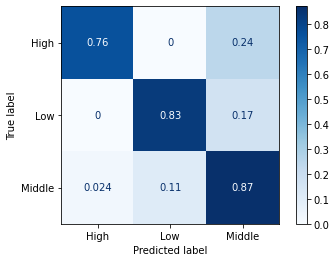

In [12]:
plot_confusion_matrix(logit, X_test_scaled, y_test, cmap='Blues', normalize='true')

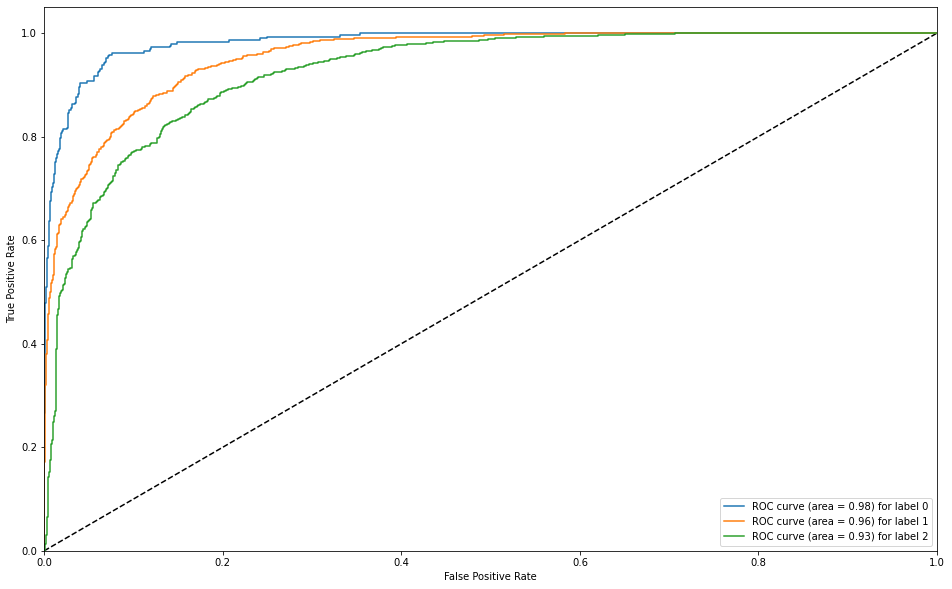

In [14]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    plt.show()

plot_multiclass_roc(logit, X_test_scaled, y_test, n_classes=3, figsize=(16, 10))
